In [1]:
from adaptive_dg.evaluation import find_events, events_to_dataframe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from adaptive_dg.evaluation.model_loading import compute_best_metrics, load_model

# Prediction visualized

In [5]:
import torch

color1 = "#96bf04"
color2 = "#2d04bf"
color3  = "#bf8b04"
color4 = "#bf0496"
colorb1 = "#0496bf"
colorb2 = "#2d04bf"

sns.set_style("whitegrid")
def plot_pred(model, ax, model_class="PredYfromX", s=35):
    xs = []
    ys = []
    preds = []
    counter = 0
    # load test set
    for x, x_set, y, e  in model.val_dataloader()[1]:
        xs.append(x)
        ys.append(y)
        with torch.no_grad():
            if model_class == "PredYfromX":
                preds.append(model.predict(x, x_set=None, e=None))
            elif model_class == "PredYfromXSet":
                preds.append(model.predict(x, x_set=x_set, e=None))
            elif model_class == "PredYfromXE":
                preds.append(model.predict(x, x_set=None, e=e))
        if counter >20:
            break
        counter +=1
    xs_ood = []
    ys_ood = []
    preds_ood = []  
    counter = 0

    # load ood set
    for x, x_set, y, e  in model.val_dataloader()[2]:
        xs_ood.append(x)
        ys_ood.append(y)
        with torch.no_grad():
            if model_class == "PredYfromX":
                preds_ood.append(model.predict(x, x_set=None, e=None))
            elif model_class == "PredYfromXSet":
                preds_ood.append(model.predict(x, x_set=x_set, e=None))
            elif model_class == "PredYfromXE":
                preds_ood.append(model.predict(x, x_set=None, e=e))
        if counter >5:
            break
        counter +=1
    xs = torch.cat(xs, dim=0)
    ys = torch.cat(ys, dim=0)
    
    # If we are interested in the predictions and not the ground turth (gt) values
    if model_class != 'gt':
        preds_ood = torch.cat(preds_ood, dim=0)
        preds = torch.cat(preds, dim=0)

    xs_ood = torch.cat(xs_ood, dim=0)
    ys_ood = torch.cat(ys_ood, dim=0)

    ax.set_xlim(-4,14)

    if model_class == "PredYfromX":
        ax.set_xticks([-2,2,6,10,14])
    else:
        ax.set_xticks([-2,2,6,10,14])
        ax.set_xticks([])
    ax.set_yticks([-2,2,6,10])
    
    # set grid
    ax.grid(True, which='both', alpha=0.3)
    
    # gt means ground truth
    if model_class == 'gt':
        ax.scatter(xs.view(-1).numpy(), ys.view(-1).numpy(), label='Ground Truth (ID)', alpha=1., s=s, marker='x', color=color1)
        ax.scatter(xs_ood.view(-1).numpy(), ys_ood.view(-1).numpy(), color=color3, label='Ground Truth (OOD)', alpha=1., s=s, marker="x")
    if model_class == 'PredYfromX':
        ax.scatter(xs.view(-1).numpy(), preds.view(-1).numpy(), color=color4, label=r"Prediction (Baseline)", s=s, marker=".")
        ax.scatter(xs_ood.view(-1).numpy(), preds_ood.view(-1).numpy(),  color=color4, s=s, marker=".")
    elif model_class == 'PredYfromXSet':
        ax.scatter(xs.view(-1).numpy(), preds.view(-1).numpy(), color=color2, label=r"Prediction (Ours)",  s=s, marker=".")
        ax.scatter(xs_ood.view(-1).numpy(), preds_ood.view(-1).numpy(),  color=color2, s=s, marker=".")
    

    return ax

Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.
Replacing existing dataset in data.


/tmp/ipykernel_2293896/21140293.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[0]._sizes = [100]
/tmp/ipykernel_2293896/21140293.py:37: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[1]._sizes = [100]
/tmp/ipykernel_2293896/21140293.py:38: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[2]._sizes = [100]
/tmp/ipykernel_2293896/21140293.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[3]._sizes = [100]
/tmp/ipykernel_2293896/21140

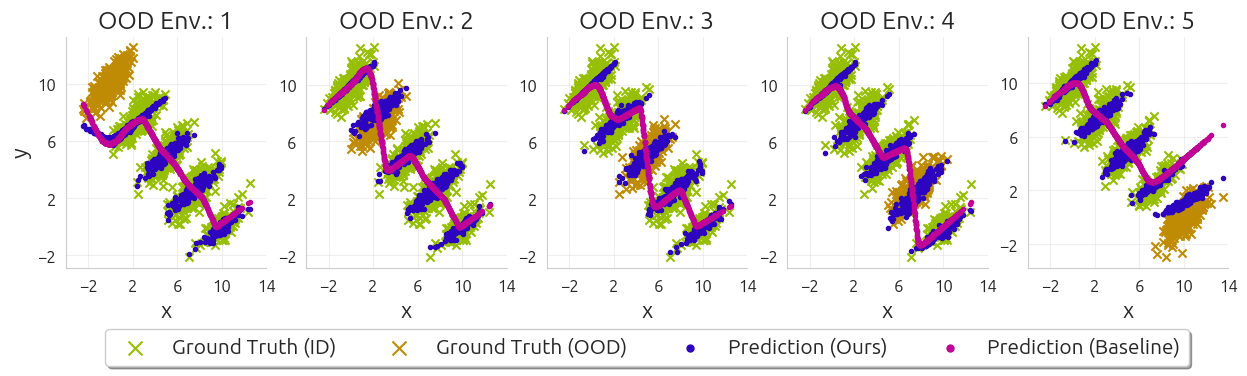

In [6]:
# We consider the model trained on the simpson dataset with seed=42
seed = 42
data_set = 'Simpson'

plt.rc("font", family="Ubuntu")

directory = "log_simpson_nonlinear/" 
fig, axs = plt.subplots(1,5, figsize=(15,3))
domains = [0,1,2, 3,4]
for num_domain, domain in enumerate(domains):
    #for num_domain, ax in enumerate(axs.flatten()):
    model = load_model('PredYfromX', domain, directory, data_set=data_set, seed=seed)
    ax = plot_pred(model, axs[ num_domain], model_class='gt')
    for num_class, model_class in enumerate(['PredYfromXSet', 'PredYfromX']):
        #domain = domains[num_domain]

        model = load_model(model_class, domain, directory, data_set=data_set, seed=seed)
        
        ax = plot_pred(model, axs[ num_domain], model_class=model_class)
        if num_domain == 0:
            axs[ num_domain].set_ylabel("y", fontsize=16)
        else:
            axs[num_domain].set_ylabel("", fontsize=16)
        if num_class == 0:
            axs[num_domain].set_title(f"OOD Env.: {domain+1}", fontsize=18)
        else:
            axs[num_domain].set_xlabel("x", fontsize=16)
        ax.set_xticks([-2,2,6,10,14])
        sns.despine()
        ax.xaxis.set_tick_params(labelsize=12)
        ax.yaxis.set_tick_params(labelsize=12)

# Put a legend below current axis
lgnd = axs[ 0].legend(loc='upper center', bbox_to_anchor=(2.9, -0.22),
          fancybox=True, shadow=True, ncol=5, fontsize=15)
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
lgnd.legendHandles[3]._sizes = [100]
 
plt.savefig(f"result_plots/pred_{data_set}_nonlinear.png", bbox_inches='tight', dpi=300)
plt.tight_layout()